Practice Project - 7

# Big Data Mart Sales Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.



In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_bd=pd.read_csv("bigdatamart_Train.csv")
df_bd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# First 10 rows
df_bd.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
# Last 10 rows
df_bd.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# Sample
df_bd.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3992,FDC34,16.0,Regular,0.173463,Snack Foods,157.6972,OUT018,2009,Medium,Tier 3,Supermarket Type2,2960.1468
6652,FDU26,16.7,Regular,0.042611,Dairy,117.2782,OUT035,2004,Small,Tier 2,Supermarket Type1,715.0692
5730,FDR10,17.6,Low Fat,0.016805,Snack Foods,163.4552,OUT010,1998,NaN,Tier 3,Grocery Store,649.8208
4981,FDX47,NaN,Regular,0.034437,Breads,156.5288,OUT027,1985,Medium,Tier 3,Supermarket Type3,4870.9928


In [6]:
df_bd.shape

(8523, 12)

This dataset contains 8523 rows and 12 columns.

# EDA

In [7]:
# Column Names
df_bd.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# Column Data Types
df_bd.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
# Checking for null values
df_bd.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Sum of null values if any...
df_bd.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As seen above, there are 1463 null values in "Item_Weight" and 2410 null values in "Outlet_Size" respectively.

# Treating Null Values in the Dataset

In [11]:
df_bd.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
df_bd.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

"Item_Weight" is Float datatype so, null values shall be filled with mean value of the column.

In [13]:
df_bd['Item_Weight'].fillna(df_bd['Item_Weight'].mean(),inplace=True)

In [14]:
df_bd['Item_Weight'].isnull().sum()

0

"Outlet_Size" is Categorical column so null values shall be filled with mode or common value of the column.

In [15]:
df_bd['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
df_bd['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
common_value = 'Medium'
df_bd['Outlet_Size'] = df_bd['Outlet_Size'].fillna(common_value)

In [18]:
df_bd['Outlet_Size'].isnull().sum()

0

In [19]:
df_bd.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

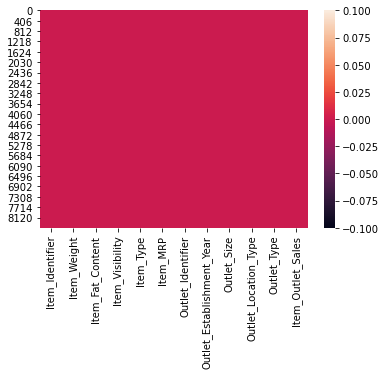

In [20]:
sns.heatmap(df_bd.isnull())

Now, there are no null values present in the dataset.

In [21]:
df_bd.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
# Mean of our target variable 'Item_Outlet_Sales'
df_bd.groupby('Item_Outlet_Sales').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Outlet_Sales,,,,
33.2900,9.302500,0.032205,33.1400,1998.0
33.9558,12.857645,0.134328,35.0558,1985.0
34.6216,12.857645,0.073077,34.3216,1985.0
35.2874,7.155000,0.281510,33.8874,1998.0
36.6190,14.103823,0.024006,34.9190,1991.5
...,...,...,...,...
10306.5840,12.857645,0.030693,228.0352,1985.0
10993.6896,12.857645,0.088840,254.2672,1985.0
11445.1020,12.857645,0.000000,253.0356,1985.0


In [23]:
df_bd.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

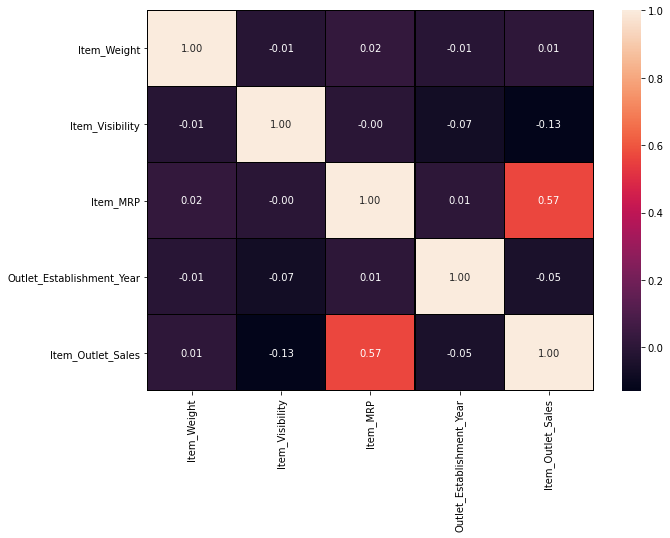

In [24]:
# Visualizing df_bd.corr() using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_bd.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

From the above heatmap we see that the Highly correlated items are "Item_Outlet_Sales" & "Item_MRP".

In [25]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Visualization

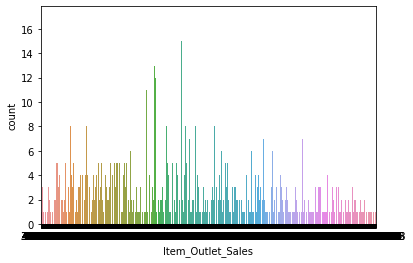

In [26]:
sns.countplot(df_bd['Item_Outlet_Sales'])
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

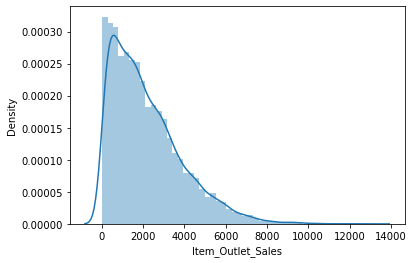

In [27]:
sns.distplot(df_bd['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

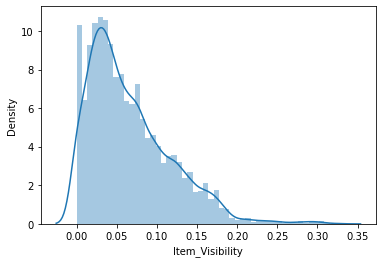

In [28]:
sns.distplot(df_bd['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

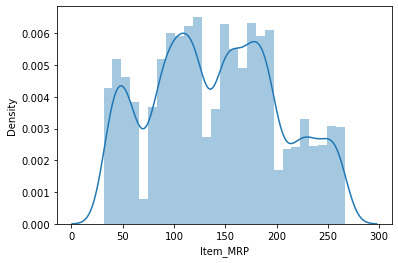

In [29]:
sns.distplot(df_bd['Item_MRP'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

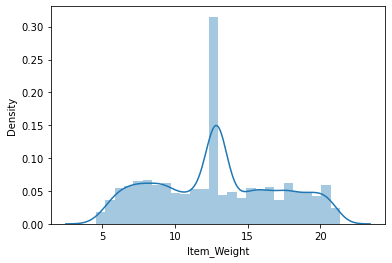

In [30]:
sns.distplot(df_bd['Item_Weight'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

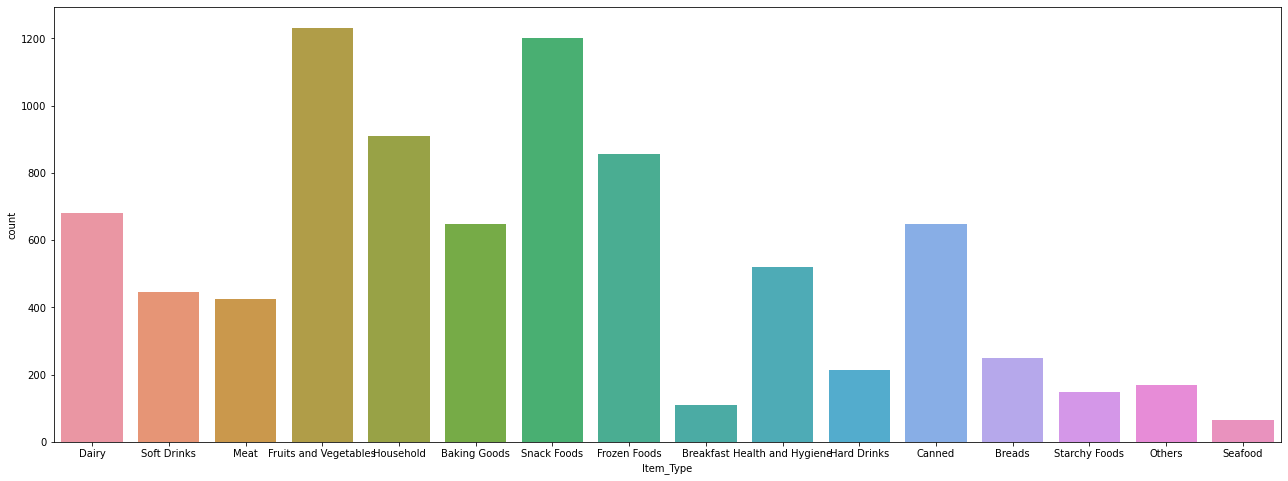

In [31]:
plt.figure(figsize=(22,8))
sns.countplot(df_bd['Item_Type'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

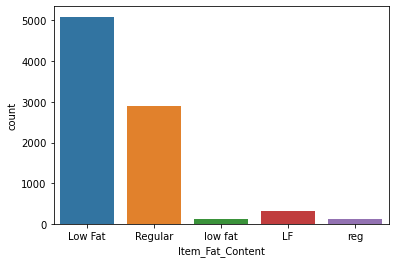

In [32]:
sns.countplot(df_bd['Item_Fat_Content'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

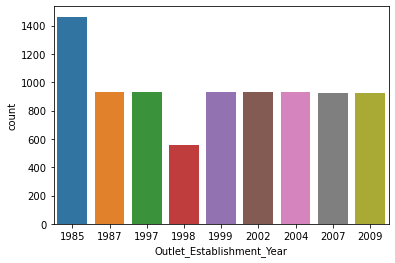

In [33]:
sns.countplot(df_bd['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

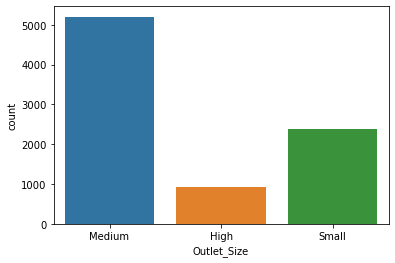

In [34]:
sns.countplot(df_bd['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

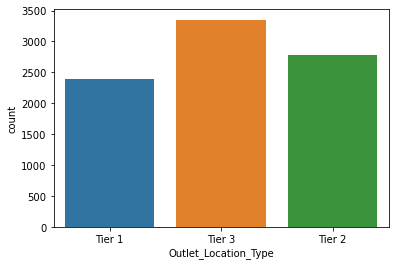

In [35]:
sns.countplot(df_bd['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

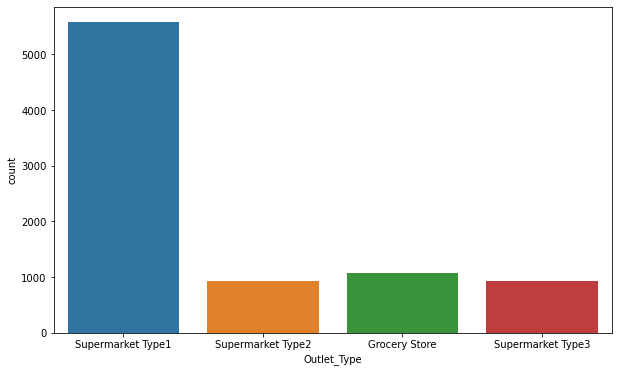

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df_bd['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

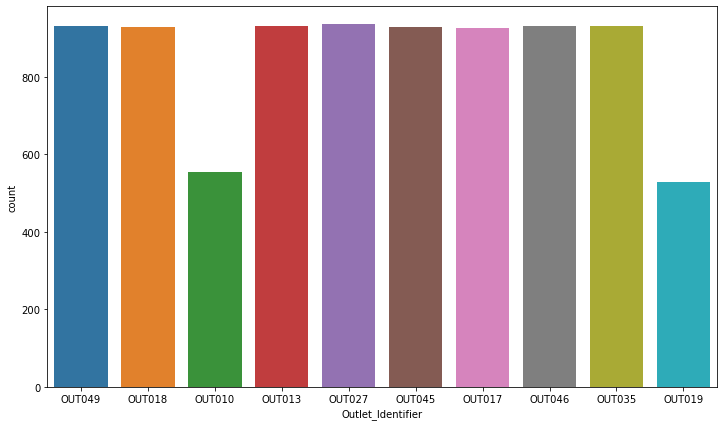

In [37]:
plt.figure(figsize=(12,7))
sns.countplot(df_bd['Outlet_Identifier'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

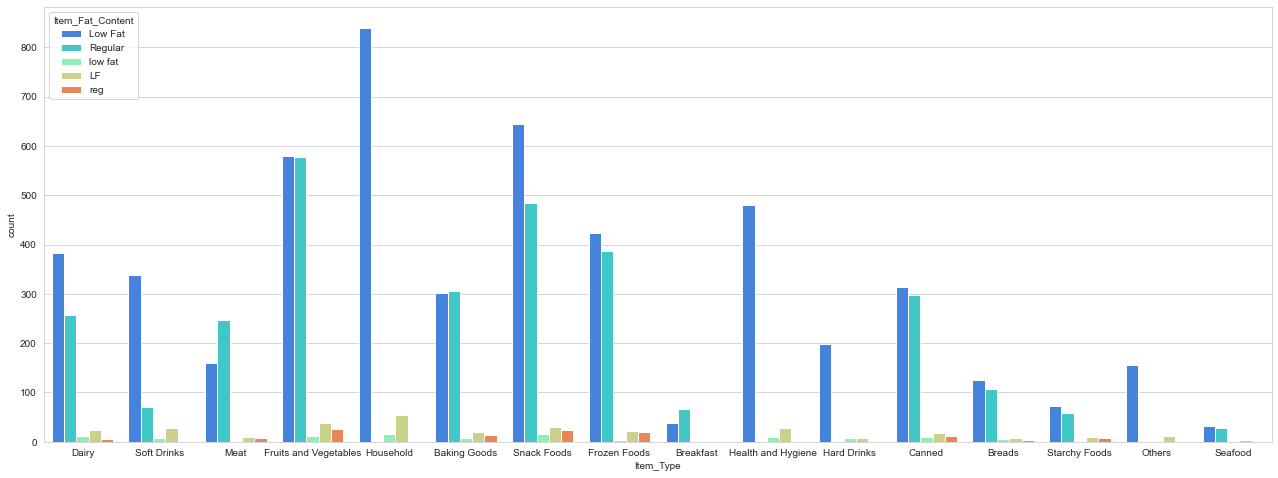

In [38]:
plt.figure(figsize=(22,8))
sns.set_style('whitegrid')
sns.countplot(x='Item_Type',hue='Item_Fat_Content',data=df_bd,palette='rainbow')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

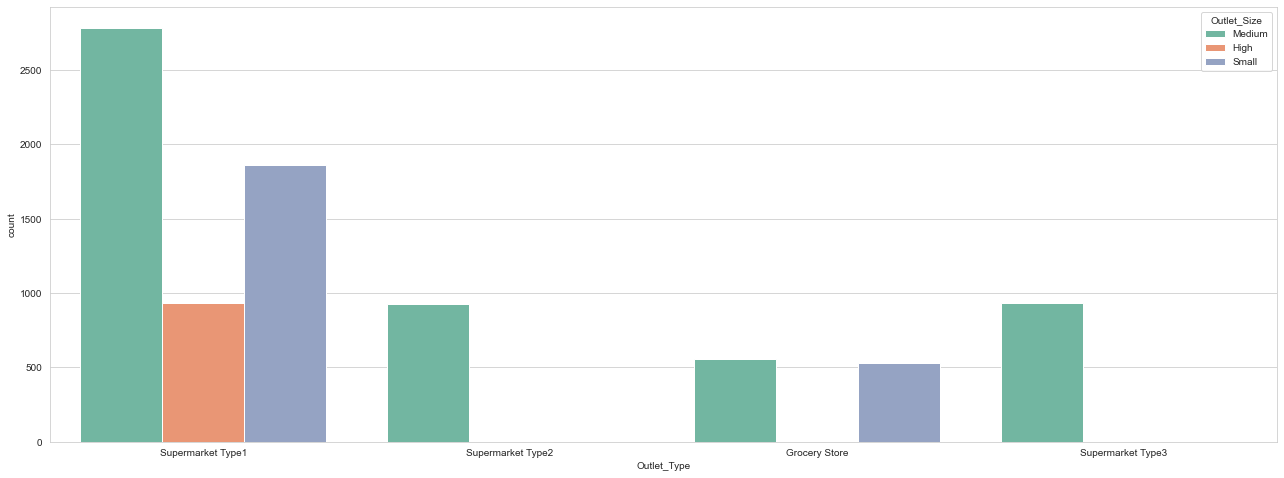

In [39]:
plt.figure(figsize=(22,8))
sns.set_style('whitegrid')
sns.countplot(x='Outlet_Type',hue='Outlet_Size',data=df_bd,palette='Set2')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

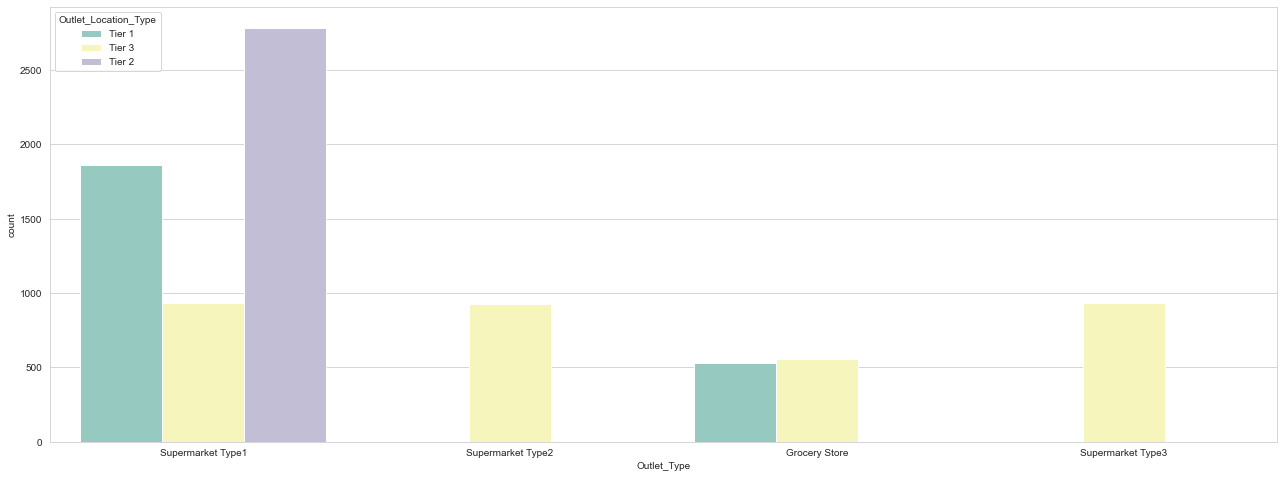

In [40]:
plt.figure(figsize=(22,8))
sns.set_style('whitegrid')
sns.countplot(x='Outlet_Type',hue='Outlet_Location_Type',data=df_bd,palette='Set3')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

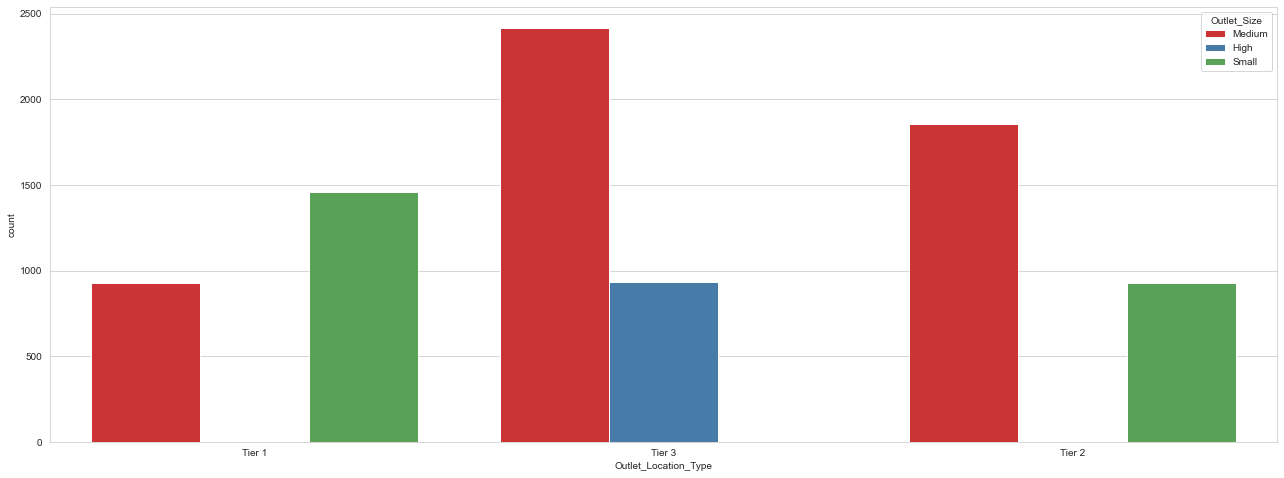

In [41]:
plt.figure(figsize=(22,8))
sns.set_style('whitegrid')
sns.countplot(x='Outlet_Location_Type',hue='Outlet_Size',data=df_bd,palette='Set1')

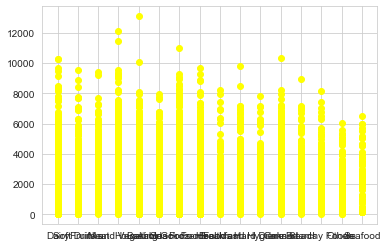

In [42]:
plt.scatter('Item_Type','Item_Outlet_Sales',data=df_bd,color='yellow')

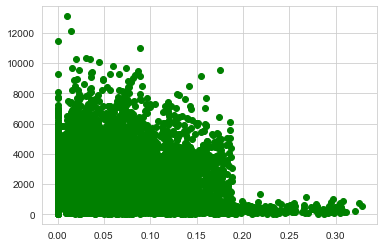

In [43]:
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df_bd,color='green')

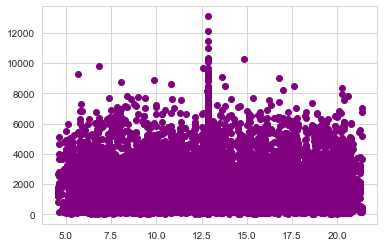

In [44]:
plt.scatter('Item_Weight','Item_Outlet_Sales',data=df_bd,color='purple')

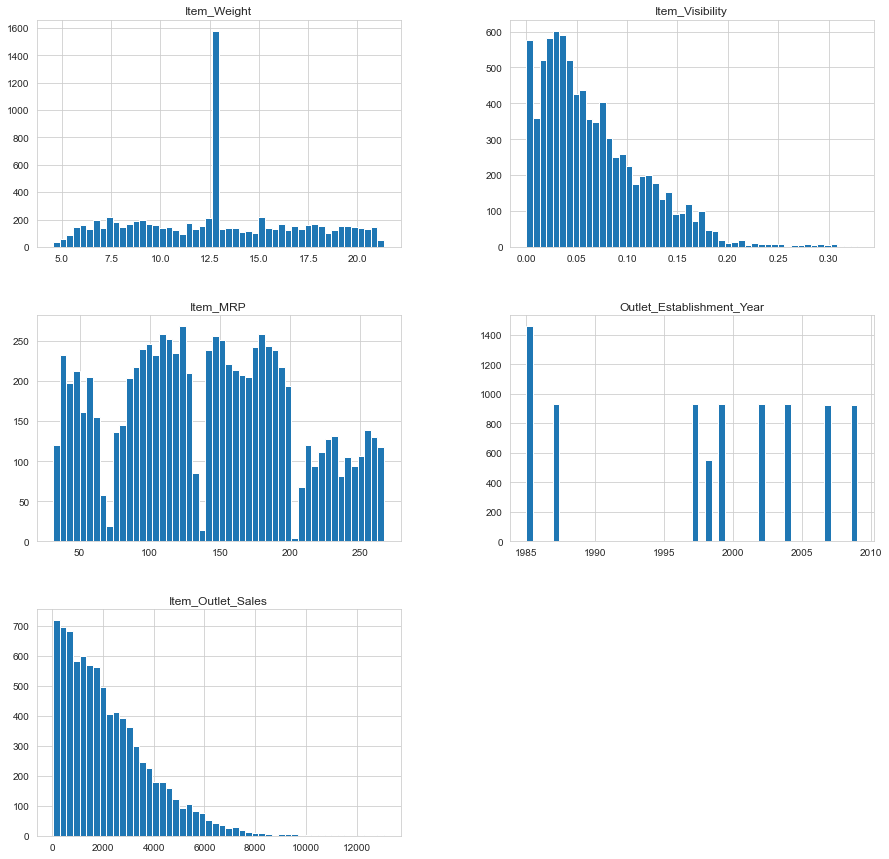

In [45]:
df_bd.hist(figsize=(15,15),bins=50)
plt.show()

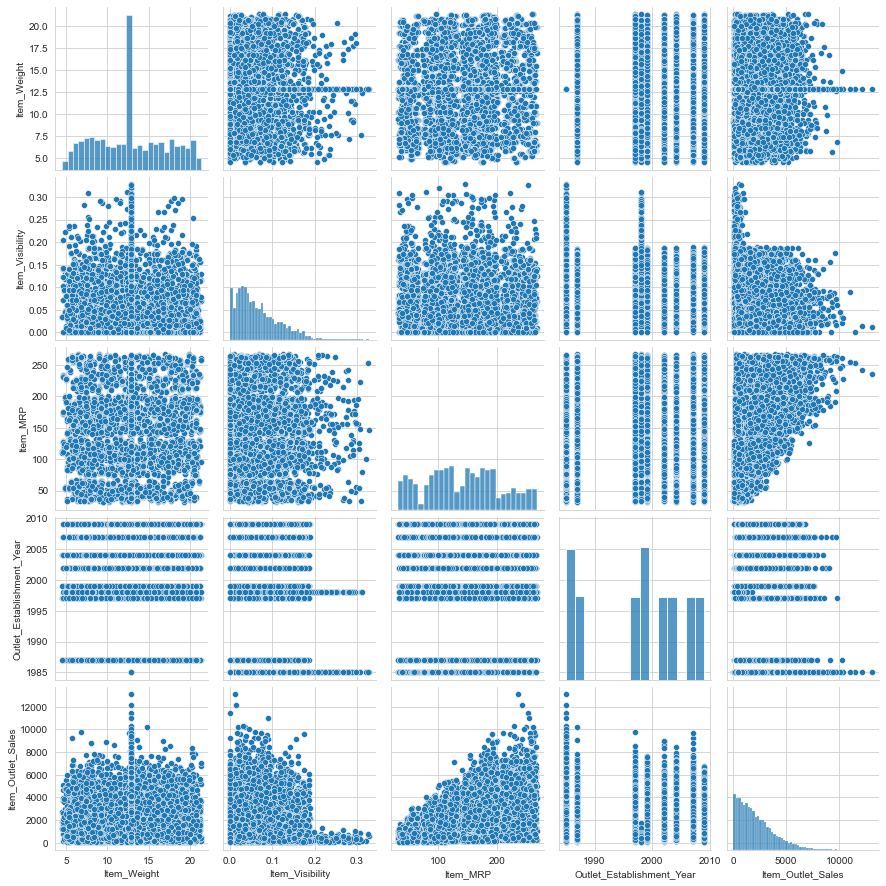

In [46]:
sns.pairplot(df_bd)

# Encoding the Data Frame

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()
df_bd['Item_Identifier'] = le.fit_transform(df_bd['Item_Identifier'])
df_bd['Item_Fat_Content'] = le.fit_transform(df_bd['Item_Fat_Content'])
df_bd['Item_Type'] = le.fit_transform(df_bd['Item_Type'])
df_bd['Outlet_Identifier'] = le.fit_transform(df_bd['Outlet_Identifier'])
df_bd['Outlet_Size'] = le.fit_transform(df_bd['Outlet_Size'])
df_bd['Outlet_Location_Type'] = le.fit_transform(df_bd['Outlet_Location_Type'])
df_bd['Outlet_Type'] = le.fit_transform(df_bd['Outlet_Type'])

In [49]:
df_bd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [50]:
df_bd.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

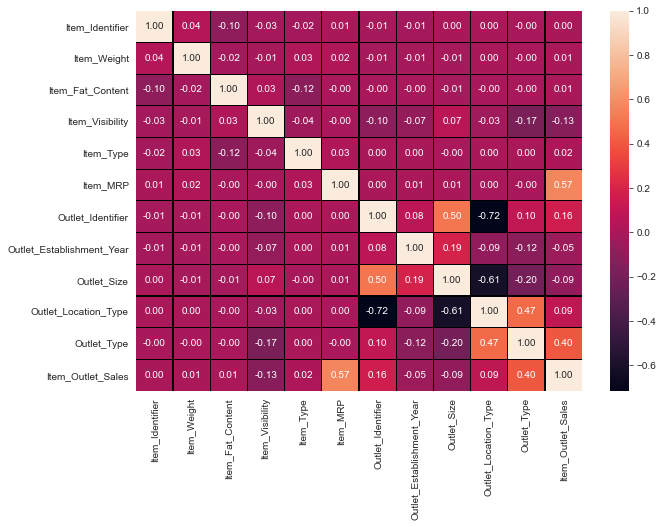

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(df_bd.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

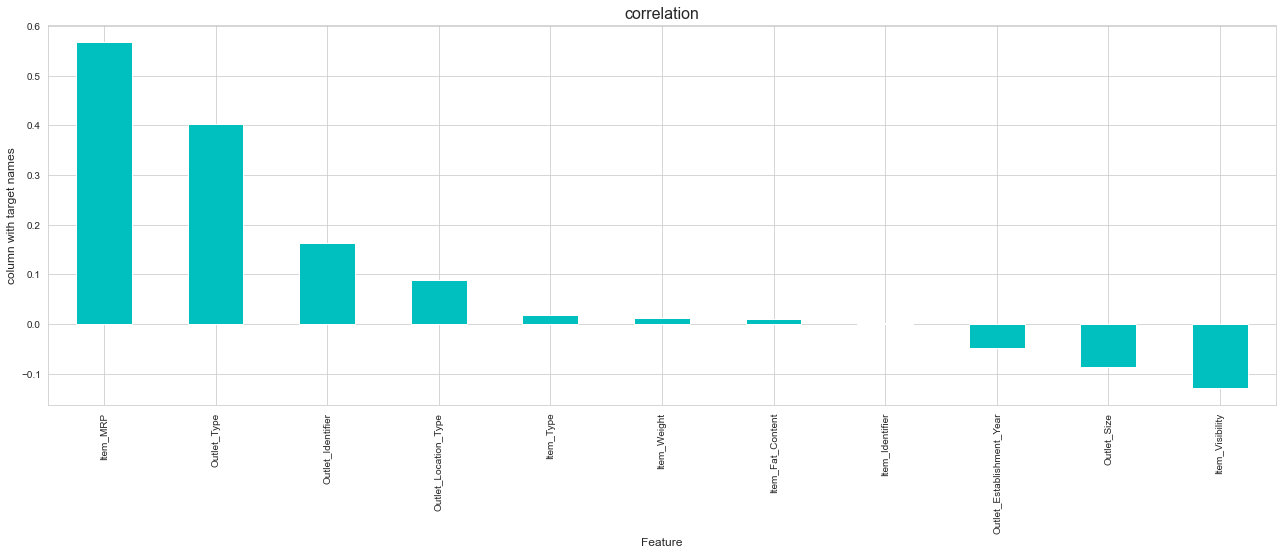

In [52]:
plt.figure(figsize=(22,7))
df_bd.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=12)
plt.ylabel('column with target names',fontsize=12)
plt.title('correlation',fontsize=16)
plt.show()

# VIF

In [53]:
vif_data= df_bd.drop('Item_Outlet_Sales',axis=1)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_bd_sc= sc.fit_transform(vif_data)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
VIF= pd.DataFrame()
VIF['features']= vif_data.columns

In [57]:
VIF['VIF']= [variance_inflation_factor(df_bd_sc,i) for i in range(len(vif_data.columns))]

In [58]:
VIF

,features,VIF
0,Item_Identifier,1.013706
1,Item_Weight,1.003732
2,Item_Fat_Content,1.025474
3,Item_Visibility,1.064255
4,Item_Type,1.017436
5,Item_MRP,1.001978
6,Outlet_Identifier,4.149231
7,Outlet_Establishment_Year,1.082108
8,Outlet_Size,1.715129
9,Outlet_Location_Type,5.866098


# Outliers

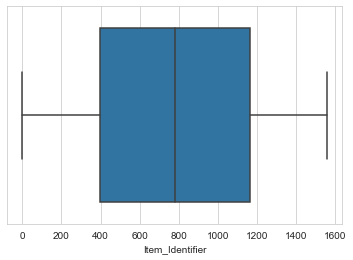

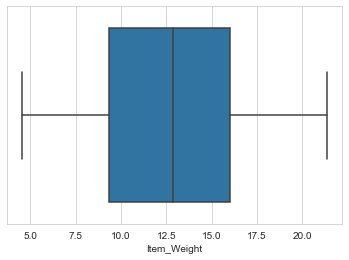

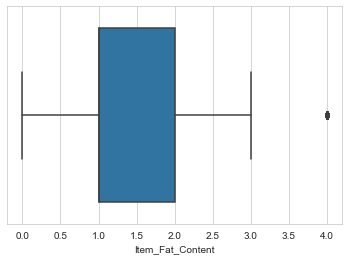

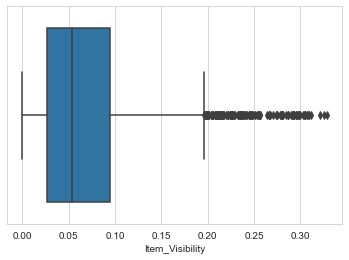

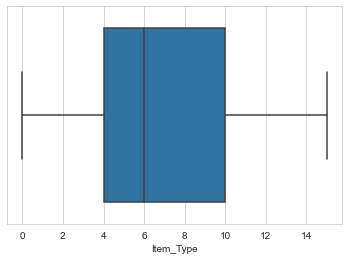

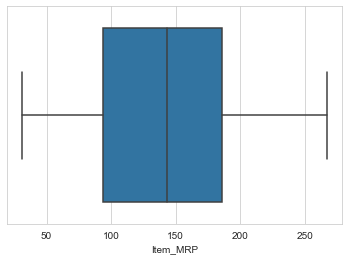

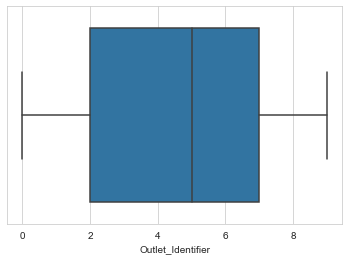

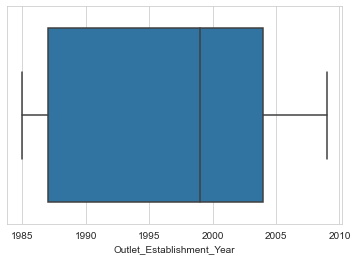

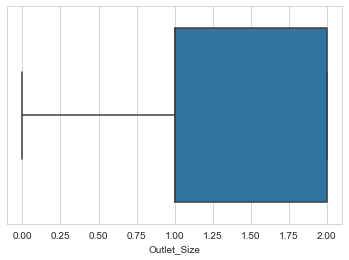

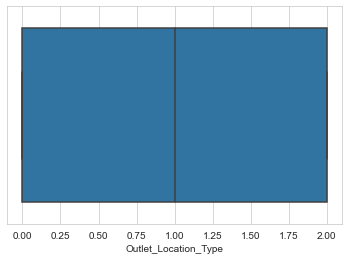

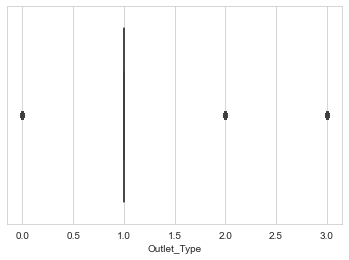

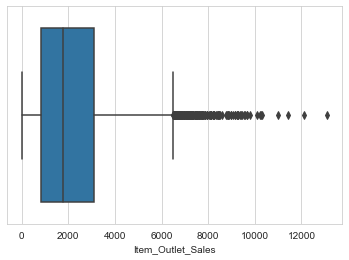

In [59]:
for i in df_bd.columns:
    sns.boxplot(df_bd[i])
    plt.show()

Item_Identifier                 AxesSubplot(0.125,0.536818;0.065678x0.343182)
Item_Weight                  AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Item_Fat_Content             AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Item_Visibility              AxesSubplot(0.361441,0.536818;0.065678x0.343182)
Item_Type                    AxesSubplot(0.440254,0.536818;0.065678x0.343182)
Item_MRP                     AxesSubplot(0.519068,0.536818;0.065678x0.343182)
Outlet_Identifier            AxesSubplot(0.597881,0.536818;0.065678x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.676695,0.536818;0.065678x0.343182)
Outlet_Size                  AxesSubplot(0.755508,0.536818;0.065678x0.343182)
Outlet_Location_Type         AxesSubplot(0.834322,0.536818;0.065678x0.343182)
Outlet_Type                        AxesSubplot(0.125,0.125;0.065678x0.343182)
Item_Outlet_Sales               AxesSubplot(0.203814,0.125;0.065678x0.343182)
dtype: object

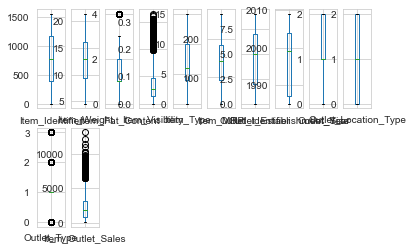

In [60]:
df_bd.plot(kind='box',subplots=True,layout=(2,10))

As seen above, we can see some outliers present in "Item_Fat_Content", "Item_Visibility", "Outlet_Type" and "Item_Outlet_Sales".

# Removing Outliers

Z-Score is used to remove outliers.

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(df_bd))
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [62]:
# New data frame
df_new_bd=df_bd[(z<3).all(axis=1)]
df_new_bd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [63]:
df_new_bd.shape

(8222, 12)

In [64]:
df_bd.shape

(8523, 12)

In [65]:
Data_loss=((8523-8222)/8523)*100
Data_loss

3.5316203214830457

The data loss after removing outliers is 3.53 %.

# Skewness

In [66]:
df_new_bd.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

Using Power Transform to remove skewness.

In [67]:
from sklearn.preprocessing import power_transform
df_bd_new=power_transform(df_new_bd)

In [68]:
df_bd_new

array([[-1.45691592, -0.81766492, -0.55319135, ..., -1.37620889,
        -0.13508106,  1.03140409],
       [-2.08876736, -1.72429667,  1.1617017 , ...,  1.0952949 ,
         1.05485046, -1.24928721],
       [-0.15559082,  1.07935446, -0.55319135, ..., -1.37620889,
        -0.13508106,  0.2195667 ],
       ...,
       [ 1.19648612, -0.49341755, -0.55319135, ..., -0.1266511 ,
        -0.13508106, -0.41735569],
       [-0.11435156, -1.36561856,  1.1617017 , ...,  1.0952949 ,
         1.05485046,  0.06287063],
       [-1.85741534,  0.48880913, -0.55319135, ..., -1.37620889,
        -0.13508106, -0.82956924]])

In [69]:
type(df_bd_new)

numpy.ndarray

In [70]:
df_bd.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [71]:
df_bdms=pd.DataFrame(df_bd_new,columns=df_bd.columns)

In [72]:
df_bdms.skew()

Item_Identifier             -0.296537
Item_Weight                 -0.069934
Item_Fat_Content             0.017038
Item_Visibility              0.116318
Item_Type                   -0.166116
Item_MRP                    -0.112220
Outlet_Identifier           -0.215616
Outlet_Establishment_Year   -0.222552
Outlet_Size                 -0.044624
Outlet_Location_Type        -0.216697
Outlet_Type                  0.010506
Item_Outlet_Sales           -0.094680
dtype: float64

In [73]:
df_bdms[np.abs(df_bdms)>0.25].all()

Item_Identifier              True
Item_Weight                  True
Item_Fat_Content             True
Item_Visibility              True
Item_Type                    True
Item_MRP                     True
Outlet_Identifier            True
Outlet_Establishment_Year    True
Outlet_Size                  True
Outlet_Location_Type         True
Outlet_Type                  True
Item_Outlet_Sales            True
dtype: bool

# Model Building & Hyper Parameter Tuning

In [74]:
df_bdms

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.456916,-0.817665,-0.553191,-1.139908,-0.716214,1.641122,1.419282,0.031704,-0.288934,-1.376209,-0.135081,1.031404
1,-2.088767,-1.724297,1.161702,-1.030767,1.508583,-1.593026,-0.559497,1.451492,-0.288934,1.095295,1.054850,-1.249287
2,-0.155591,1.079354,-0.553191,-1.115560,0.684002,0.096173,1.419282,0.031704,-0.288934,-1.376209,-0.135081,0.219567
3,0.766642,1.438157,1.161702,-1.731271,-0.218734,0.706727,-1.817079,-0.093218,-0.288934,1.095295,-1.971736,-0.867126
4,1.089393,-0.912103,-0.553191,-1.731271,0.467128,-1.472654,-1.353569,-1.293670,-1.916231,1.095295,-0.135081,-0.594933
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,-0.842604,-1.459815,-0.553191,0.033454,1.308057,1.165647,-1.353569,-1.293670,-1.916231,1.095295,-0.135081,0.592678
8218,0.333778,-1.054416,1.161702,-0.212089,-1.923668,-0.450934,0.800887,0.424107,-0.288934,-0.126651,-0.135081,-1.095227
8219,1.196486,-0.493418,-0.553191,-0.536583,0.244916,-0.858592,0.478956,0.701080,1.390615,-0.126651,-0.135081,-0.417356
8220,-0.114352,-1.365619,1.161702,1.535383,1.308057,-0.537346,-0.559497,1.451492,-0.288934,1.095295,1.054850,0.062871


In [75]:
x=df_bdms.drop(columns='Item_Outlet_Sales')
y=df_bdms['Item_Outlet_Sales']

In [76]:
x.shape

(8222, 11)

In [77]:
y.shape

(8222,)

In [78]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# Best Random State

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [81]:
maxAccu=0
maxRS=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.20, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    r2=r2_score(y_test,predrs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.6327597510844297  on Random State : 6


We can see that the Highest testing R2 Score is achieved at random state = 6.

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=6)

In [84]:
x_train.shape

(6577, 11)

In [85]:
x_test.shape

(1645, 11)

In [86]:
y_train.shape

(6577,)

In [87]:
y_test.shape

(1645,)

# Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
lr.coef_

array([ 0.00298332, -0.00536175,  0.0103652 , -0.02991244, -0.0015544 ,
        0.5658788 ,  0.05642552,  0.03662596, -0.1570121 , -0.21167757,
        0.53180903])

In [90]:
lr.intercept_

-0.0031408989534152942

In [91]:
lr.score(x_train,y_train)

0.5912719751954479

In [92]:
# Predicting the value
pred_lr=lr.predict(x_test)
print("Predicted value: ",pred_lr)
print("Actual value: ",y_test)

Predicted value:  [-2.35750523 -0.45029034 -0.46478559 ... -0.75686676 -0.15733197
 -1.28871503]
Actual value:  7683   -2.125860
1993   -0.944709
3746   -1.613741
2759    1.609856
6567   -0.245883
          ...   
7149    1.321663
5430    0.983420
8133   -0.739869
3169    0.798915
5261   -1.243086
Name: Item_Outlet_Sales, Length: 1645, dtype: float64


In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

Error:
Mean absolute error:  0.4904296974842379
Mean squared error:  0.3726094415200586
Root Mean squared error:  0.610417432188874


In [94]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_lr))

0.6327597510844297


In [95]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.598219083250259

# Lasso Regression

In [96]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

ls= Lasso()
parameters1 = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10],'selection':['cyclic','random'],'random_state':list(range(0,10))}
gd1= GridSearchCV(ls,parameters1)
gd1.fit(x_train,y_train)

print(gd1.best_params_)

{'alpha': 0.001, 'random_state': 6, 'selection': 'random'}


In [97]:
ls1 = Lasso(alpha=0.001,random_state=6,selection='random')
ls1.fit(x_train,y_train)

Lasso(alpha=0.001, random_state=6, selection='random')

In [98]:
ls1.score(x_train,y_train)

0.5912560252588279

In [99]:
ls1.coef_

array([ 0.001889  , -0.00433491,  0.00941337, -0.02918017, -0.00066414,
        0.56483759,  0.0582024 ,  0.03536288, -0.15425271, -0.20669257,
        0.52908645])

In [100]:
pred_ls=ls1.predict(x_test)
print("Predicted value: ",pred_ls)
print("Actual value: ",y_test)

Predicted value:  [-2.34703941 -0.45445375 -0.45788299 ... -0.75216009 -0.16190025
 -1.28617855]
Actual value:  7683   -2.125860
1993   -0.944709
3746   -1.613741
2759    1.609856
6567   -0.245883
          ...   
7149    1.321663
5430    0.983420
8133   -0.739869
3169    0.798915
5261   -1.243086
Name: Item_Outlet_Sales, Length: 1645, dtype: float64


In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_ls))
print('Mean squared error: ',mean_squared_error(y_test,pred_ls))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean absolute error:  0.49044479430323396
Mean squared error:  0.3724537642673689
Root Mean squared error:  0.6102899018231982


In [102]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_ls))

0.6329131850736358


In [103]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(ls1,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5982376480689073

# Ridge Regression

In [104]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

rd = Ridge()
parameters2 = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10],'solver':['auto','svg'],'random_state':list(range(0,10))}
gd2= GridSearchCV(rd,parameters2)
gd2.fit(x_train,y_train)

print(gd2.best_params_)

{'alpha': 10, 'random_state': 0, 'solver': 'auto'}


In [105]:
rd1 = Ridge(alpha=10,random_state=0,solver='auto')
rd1.fit(x_train,y_train)

Ridge(alpha=10, random_state=0)

In [106]:
rd1.score(x_train,y_train)

0.5912678778345255

In [107]:
rd1.coef_

array([ 0.0030028 , -0.00531892,  0.01035865, -0.0300107 , -0.00153284,
        0.56498806,  0.05931497,  0.03663803, -0.15657357, -0.20788262,
        0.52897607])

In [108]:
pred_rd=rd1.predict(x_test)
print("Predicted value: ",pred_rd)
print("Actual value: ",y_test)

Predicted value:  [-2.35148749 -0.45268461 -0.46178744 ... -0.75345051 -0.15970503
 -1.28540893]
Actual value:  7683   -2.125860
1993   -0.944709
3746   -1.613741
2759    1.609856
6567   -0.245883
          ...   
7149    1.321663
5430    0.983420
8133   -0.739869
3169    0.798915
5261   -1.243086
Name: Item_Outlet_Sales, Length: 1645, dtype: float64


In [109]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_rd))
print('Mean squared error: ',mean_squared_error(y_test,pred_rd))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean absolute error:  0.4905129093771832
Mean squared error:  0.37257095368094584
Root Mean squared error:  0.61038590553923


In [110]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_rd))

0.632797684325086


In [111]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rd1,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5982213391322256

# KNearest Neighbors Regressor

In [112]:
from sklearn import neighbors

parameters3 = {'n_neighbors':[2,3,4,5,6,7,8,9],'weights':['uniform','distance'],'p':[0,1,2],'algorithm':['auto','kd_tree','ball_tree']}
knn=neighbors.KNeighborsRegressor()
gd3=GridSearchCV(knn,parameters3)
gd3.fit(x_train,y_train)

print(gd3.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


In [113]:
kn=neighbors.KNeighborsRegressor(n_neighbors=9,algorithm='auto',p=2,weights='distance')
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

1.0

In [114]:
pred_knn = kn.predict(x_test)
print("Predicted value: ",pred_knn)
print("Actual value: ",y_test)

Predicted value:  [-1.89272108  0.21925083 -1.18049878 ... -0.91765157  0.03170365
 -0.75928608]
Actual value:  7683   -2.125860
1993   -0.944709
3746   -1.613741
2759    1.609856
6567   -0.245883
          ...   
7149    1.321663
5430    0.983420
8133   -0.739869
3169    0.798915
5261   -1.243086
Name: Item_Outlet_Sales, Length: 1645, dtype: float64


In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

Error:
Mean absolute error:  0.4655912153589628
Mean squared error:  0.35039787078436363
Root Mean squared error:  0.5919441449869773


In [116]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_knn))

0.6546512596101022


In [117]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(kn,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6131614043799536

# Decision Tree Regressor

In [118]:
from sklearn.tree import DecisionTreeRegressor

parameters4 = {'criterion':['squared_error','absolute_error'], 'max_features':["auto", "sqrt","log2"],'min_samples_split': [0,1,2,3],'random_state':[0,1,2]}
dtr = DecisionTreeRegressor()
gd4= GridSearchCV(dtr,parameters4)
gd4.fit(x_train,y_train)

print(gd4.best_params_)

{'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_split': 3, 'random_state': 2}


In [119]:
dt = DecisionTreeRegressor(criterion="squared_error",max_features="sqrt",min_samples_leaf=3,random_state=2)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.8406424111785726

In [120]:
pred_dtr=dt.predict(x_test)
print("Predicted value: ",pred_dtr)
print("Actual value: ",y_test)

Predicted value:  [-2.27837253 -0.28054065 -1.69592328 ... -0.79207188  0.09670485
 -0.37200289]
Actual value:  7683   -2.125860
1993   -0.944709
3746   -1.613741
2759    1.609856
6567   -0.245883
          ...   
7149    1.321663
5430    0.983420
8133   -0.739869
3169    0.798915
5261   -1.243086
Name: Item_Outlet_Sales, Length: 1645, dtype: float64


In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

Error:
Mean absolute error:  0.5380178589945926
Mean squared error:  0.4664716381257976
Root Mean squared error:  0.6829872898713398


In [122]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_dtr))

0.5402500811613229


In [123]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4822235031319774

# SVR

In [124]:
from sklearn.svm import SVR

parameters5={'kernel':['linear','poly','rbf'],'degree':[0,1,2,3,4],'gamma':['scale','auto'],'coef0':[0.0,0.1,0.2,0.3]}
svr=SVR()
gd5=GridSearchCV(svr,parameters5)
gd5.fit(x_train,y_train)

print(gd5.best_params_)

{'coef0': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [125]:
sv=SVR(coef0=0.1,degree=2,gamma='scale',kernel='poly')
sv.fit(x_train,y_train)

SVR(coef0=0.1, degree=2, kernel='poly')

In [126]:
sv.score(x_train,y_train)

0.6720866534140633

In [127]:
pred_svr = sv.predict(x_test)
print("Predicted value: ",pred_svr)
print("Actual value: ",y_test)

Predicted value:  [-2.28945246 -0.1631342  -1.08518383 ... -0.81764151  0.11960121
 -0.73708412]
Actual value:  7683   -2.125860
1993   -0.944709
3746   -1.613741
2759    1.609856
6567   -0.245883
          ...   
7149    1.321663
5430    0.983420
8133   -0.739869
3169    0.798915
5261   -1.243086
Name: Item_Outlet_Sales, Length: 1645, dtype: float64


In [128]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

Error:
Mean absolute error:  0.4190680668376303
Mean squared error:  0.2866559150657249
Root Mean squared error:  0.5354025728979316


In [129]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_svr))

0.7174747124699729


In [130]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(sv,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6756334615627343

# Random Forest Regressor

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters6 = {'criterion':['mse','mae'], 'max_features':["auto", "sqrt","log2"],'min_samples_split': [0,1,2],'min_samples_leaf':[0,1,2]}
rfr =RandomForestRegressor()
gd6= GridSearchCV(rfr,parameters6)
gd6.fit(x_train,y_train)

print(gd6.best_params_)

{'criterion': 'mae', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [132]:
rf = RandomForestRegressor(criterion="mae",max_features="log2",min_samples_leaf=2,min_samples_split=2)
rf.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_features='log2', min_samples_leaf=2)

In [133]:
rf.score(x_train, y_train)

0.8571562029235043

In [134]:
pred_rfr = rf.predict(x_test)
print("Predicted value: ",pred_rfr)
print("Actual value: ",y_test)

Predicted value:  [-2.00309135 -0.28480531 -1.20501566 ... -0.79329564  0.01559923
 -0.98004565]
Actual value:  7683   -2.125860
1993   -0.944709
3746   -1.613741
2759    1.609856
6567   -0.245883
          ...   
7149    1.321663
5430    0.983420
8133   -0.739869
3169    0.798915
5261   -1.243086
Name: Item_Outlet_Sales, Length: 1645, dtype: float64


In [135]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Error:')

print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))

print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

Error:
Mean absolute error:  0.42982508537786535
Mean squared error:  0.3025505364309178
Root Mean squared error:  0.5500459402912795


In [136]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_rfr))

0.7018091279298722


In [137]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6634222451971008

From the above observations, we see that the highest R2 Score belongs to SVR, followed by Random Forest Regressor.The lowest R2 Score belongs to Decision Tree Regressor.

Also, the Highest Cross Validation Score belongs to SVR model, followed by Random Forest regressor. Again the lowest cross valiation score belongs to Decision Tree regressor.

The Cross Validation Scores and R2 Scores of Linear Regression, Lasso regression and Ridge Regression are almost similar.

# Model Saving

Since SVR model is showing the highest Cross Validation Score and R2 Score, we will save the SVR Model.

In [138]:
import pickle
filename='Big_Data_Sales_P.pkl'
pickle.dump(sv,open(filename,'wb'))

# Test Dataset

In [139]:
# Dataset
df_bd1=pd.read_csv("bigdatamart_Test.csv")
df_bd1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [140]:
# Column Data Types
df_bd1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [141]:
# Sum of null values if any...
df_bd1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Treating Null Values in Test Dataset

"Item_Weight" is Float datatype so, null values shall be filled with mean value of the column.

In [142]:
df_bd1['Item_Weight'].fillna(df_bd1['Item_Weight'].mean(),inplace=True)

In [143]:
df_bd1['Item_Weight'].isnull().sum()

0

"Outlet_Size" is Categorical column so null values shall be filled with mode or common value of the column.

In [144]:
df_bd1['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [145]:
df_bd1['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [146]:
common_value = 'Medium'
df_bd1['Outlet_Size'] = df_bd1['Outlet_Size'].fillna(common_value)

In [147]:
df_bd1['Outlet_Size'].isnull().sum()

0

In [148]:
df_bd1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Encoding Test Dataframe

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
le = LabelEncoder()
df_bd1['Item_Identifier'] = le.fit_transform(df_bd1['Item_Identifier'])
df_bd1['Item_Fat_Content'] = le.fit_transform(df_bd1['Item_Fat_Content'])
df_bd1['Item_Type'] = le.fit_transform(df_bd1['Item_Type'])
df_bd1['Outlet_Identifier'] = le.fit_transform(df_bd1['Outlet_Identifier'])
df_bd1['Outlet_Size'] = le.fit_transform(df_bd1['Outlet_Size'])
df_bd1['Outlet_Location_Type'] = le.fit_transform(df_bd1['Outlet_Location_Type'])
df_bd1['Outlet_Type'] = le.fit_transform(df_bd1['Outlet_Type'])

In [151]:
from sklearn.preprocessing import StandardScaler
sc_test=scale.fit_transform(df_bd1)

In [152]:
X=sc_test

In [153]:
test=pd.DataFrame(X,columns=df_bd1.columns)

In [154]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.739896,1.897460e+00,-0.575284,-1.134077,1.366916,-0.536555,1.507689,0.139891,-0.284737,-1.369215,-0.252769
1,0.659085,-1.035530e+00,4.104698,-0.531850,-0.766450,-0.868937,-0.959749,1.095512,-0.284737,-0.138827,-0.252769
2,1.420050,4.486336e-01,-0.575284,0.661316,0.892835,1.629848,-1.664731,0.020438,-0.284737,1.091560,-1.507994
3,0.079943,-1.267578e+00,-0.575284,-0.981416,1.366916,0.226697,-0.959749,1.095512,-0.284737,-0.138827,-0.252769
4,0.921719,-5.230960e-14,0.984710,1.032540,-0.766450,1.508110,0.097725,-1.532446,-0.284737,1.091560,2.257683
...,...,...,...,...,...,...,...,...,...,...,...
5676,-1.217514,-5.172506e-01,0.984710,-1.018333,1.366916,0.004727,1.155198,-0.099015,1.381166,-1.369215,-0.252769
5677,-1.049159,-1.200437e+00,0.984710,1.508493,1.840998,0.455014,-0.607258,1.334417,-0.284737,1.091560,1.002457
5678,1.433519,-6.350414e-01,-0.575284,0.153074,0.181713,-0.360485,0.802707,0.498248,-0.284737,-0.138827,-0.252769
5679,-0.575520,6.135406e-01,0.984710,-1.281690,-1.003490,1.190844,-0.959749,1.095512,-0.284737,-0.138827,-0.252769


In [157]:
loaded_model=pickle.load(open('Big_Data_Sales_P.pkl','rb'))

In [158]:
Test_predict=loaded_model.predict(test)

In [160]:
Test_BD=pd.DataFrame(data=Test_predict)
Test_BD

,0
0,-0.013139
1,-0.313292
2,-0.475249
3,0.359432
4,1.848583
...,...
5676,0.251316
5677,0.334571
5678,-0.003043
5679,0.914333


The predicted values are shown above.